# Introduction to the `Network` object

In [2]:
from pycomplexnet import Network
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Create a network from `pandas`

In [48]:
net = Network.from_pandas(
    pd.DataFrame({
        'from':['A','B','C','C','A','C','C','D','A'],
        'to':  ['B','C','B','A','C','D','E','E','D']
    })
)

In [49]:
net.node_labels

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

In [50]:
net.toarray()

array([[0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [51]:
import numpy as np

np.array_equal(
            net.toarray(),
            np.array(
                [[0., 0., 1.],
                [1., 0., 0.],
                [1., 0., 0.]]
            )
        )

False

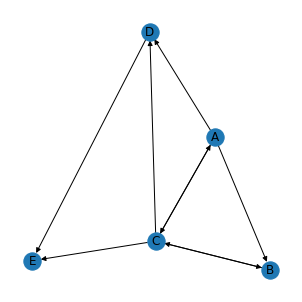

In [52]:
plt.rcParams['figure.figsize'] = (4,4)
G = nx.from_numpy_matrix(net.adjacency_matrix.toarray(), create_using=nx.DiGraph)
pos = nx.spring_layout(G)
# Plot it
nx.draw(G, pos, with_labels=False)
nx.draw_networkx_labels(G, pos, net.node_labels, font_size=12)
plt.show()

## Some metrics involving single nodes and pairs of nodes

In [53]:
net.get_num_triangles(['A','B','C','D','E'])

[1, 1, 1, 0, 0]

In [54]:
net.get_distance('A','E')

2

In [55]:
net.get_num_shortest_paths('A','E')

2

In [56]:
net.get_num_shortest_paths_by('A','E','C')

2